# Projet d'analyse turnover dans l'entrepise ESN TechNova


## Setup

### Install dependencies


In [34]:
!uv pip install pandas matplotlib seaborn numpy scipy

Audited 5 packages in 1ms


### Loading source files

In [35]:
# Loading extrait_sirh.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

sirh = pd.read_csv('source/extrait_sirh.csv')
eval = pd.read_csv('source/extrait_eval.csv')
sondage = pd.read_csv('source/extrait_sondage.csv')

sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [36]:
sirh.head(5)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [37]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [38]:
eval.head(5)

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [39]:
sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

In [40]:
sondage.head(5)

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


## Jointure des données

In [41]:
eval['eval_number'] = eval['eval_number'].apply(lambda x: int(x.strip().split('_')[1]))

In [42]:
# Jointure sirh + eval basé sur l'ordre cohérent des lignes
merged_data = sirh.merge(eval, left_on='id_employee', right_on='eval_number', how='inner')
# Jointure sirh + eval +  sondage
merged_data = merged_data.merge(sondage, left_on='id_employee', right_on='code_sondage', how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   nombre_heures_travailless                  1470 non-null   int64 
 9   annee_experience_totale                    1470 non-null   int64 
 10  annees_dans_l_entreprise            

## Nettoyage de la data

In [43]:
data = merged_data.drop(["eval_number","code_sondage"], axis=1)
data['augementation_salaire_precedente'] = data['augementation_salaire_precedente'].apply(lambda x: int(x.strip().split('%')[0]))

In [44]:
data.select_dtypes(include='number').nunique()

id_employee                                  1470
age                                            43
revenu_mensuel                               1349
nombre_experiences_precedentes                 10
nombre_heures_travailless                       1
annee_experience_totale                        40
annees_dans_l_entreprise                       37
annees_dans_le_poste_actuel                    19
satisfaction_employee_environnement             4
note_evaluation_precedente                      4
niveau_hierarchique_poste                       5
satisfaction_employee_nature_travail            4
satisfaction_employee_equipe                    4
satisfaction_employee_equilibre_pro_perso       4
note_evaluation_actuelle                        2
augementation_salaire_precedente               15
nombre_participation_pee                        4
nb_formations_suivies                           7
nombre_employee_sous_responsabilite             1
distance_domicile_travail                      29


In [45]:
data_cleaned = data.drop(columns=['nombre_employee_sous_responsabilite','nombre_heures_travailless', 'id_employee'])

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        1470 non-null   int64 
 1   genre                                      1470 non-null   object
 2   revenu_mensuel                             1470 non-null   int64 
 3   statut_marital                             1470 non-null   object
 4   departement                                1470 non-null   object
 5   poste                                      1470 non-null   object
 6   nombre_experiences_precedentes             1470 non-null   int64 
 7   annee_experience_totale                    1470 non-null   int64 
 8   annees_dans_l_entreprise                   1470 non-null   int64 
 9   annees_dans_le_poste_actuel                1470 non-null   int64 
 10  satisfaction_employee_environnement 

In [46]:
target = 'a_quitte_l_entreprise'
cols_numeriques_continues = [
    'revenu_mensuel', 'age', 'annee_experience_totale', 
    'annees_dans_l_entreprise', 'distance_domicile_travail', 
    'annees_dans_le_poste_actuel', 'annes_sous_responsable_actuel', 
    'annees_depuis_la_derniere_promotion', 'augementation_salaire_precedente'
]
data_num = data_cleaned[cols_numeriques_continues+[target]].copy() 
data_cat = data_cleaned.drop(columns=cols_numeriques_continues)
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   genre                                      1470 non-null   object
 1   statut_marital                             1470 non-null   object
 2   departement                                1470 non-null   object
 3   poste                                      1470 non-null   object
 4   nombre_experiences_precedentes             1470 non-null   int64 
 5   satisfaction_employee_environnement        1470 non-null   int64 
 6   note_evaluation_precedente                 1470 non-null   int64 
 7   niveau_hierarchique_poste                  1470 non-null   int64 
 8   satisfaction_employee_nature_travail       1470 non-null   int64 
 9   satisfaction_employee_equipe               1470 non-null   int64 
 10  satisfaction_employee_equilibre_pro_

## Analyse statistique


### Analyse simple

In [47]:
sirh.describe(include='number')

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000


In [48]:
eval.describe(include='number')

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,1024.865306,3.153741
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,602.024335,0.360824
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,491.250000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1020.500000,3.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,1555.750000,3.000000
max,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,2068.000000,4.000000


In [49]:
sondage.describe(include='number')

,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.793878,2.799320,1.0,1024.865306,9.192517,2.912925,2.187755,4.123129
std,0.852077,1.289271,0.0,602.024335,8.106864,1.024165,3.222430,3.568136
min,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.0,491.250000,2.000000,2.000000,0.000000,2.000000
50%,1.000000,3.000000,1.0,1020.500000,7.000000,3.000000,1.000000,3.000000
75%,1.000000,3.000000,1.0,1555.750000,14.000000,4.000000,3.000000,7.000000
max,3.000000,6.000000,1.0,2068.000000,29.000000,5.000000,15.000000,17.000000


### Analyse filtrer sur la valeur du départ

#### Numérique

In [50]:
# Creer deux dataframe en fonction des agents ayant quitté ou non l'entreprise pour observer les différence
merged_data_leave = data_num[data_num['a_quitte_l_entreprise'] == 'Oui']
merged_data_stay = data_num[data_num['a_quitte_l_entreprise'] == 'Non']

# Recupération des valeurs statistiques numériques
desc_merged_data_leave = merged_data_leave.describe(include='number')
desc_merged_data_stay = merged_data_stay.describe(include='number')

##### Analyse des moyennes et ecart relatif

In [51]:
# desc_merged_data_leave.loc['mean']
ecart_relatif = ((desc_merged_data_leave.loc['mean'] - desc_merged_data_stay.loc['mean']).abs()) / desc_merged_data_stay.loc['mean']
ecart_relatif_sorted = ecart_relatif[ecart_relatif > 0].sort_values(ascending=False)
ecart_relatif_sorted

annees_dans_le_poste_actuel            0.352624
annes_sous_responsable_actuel          0.346906
annee_experience_totale                0.305001
annees_dans_l_entreprise               0.303733
revenu_mensuel                         0.299389
distance_domicile_travail              0.192612
annees_depuis_la_derniere_promotion    0.129449
age                                    0.105258
augementation_salaire_precedente       0.008804
Name: mean, dtype: float64

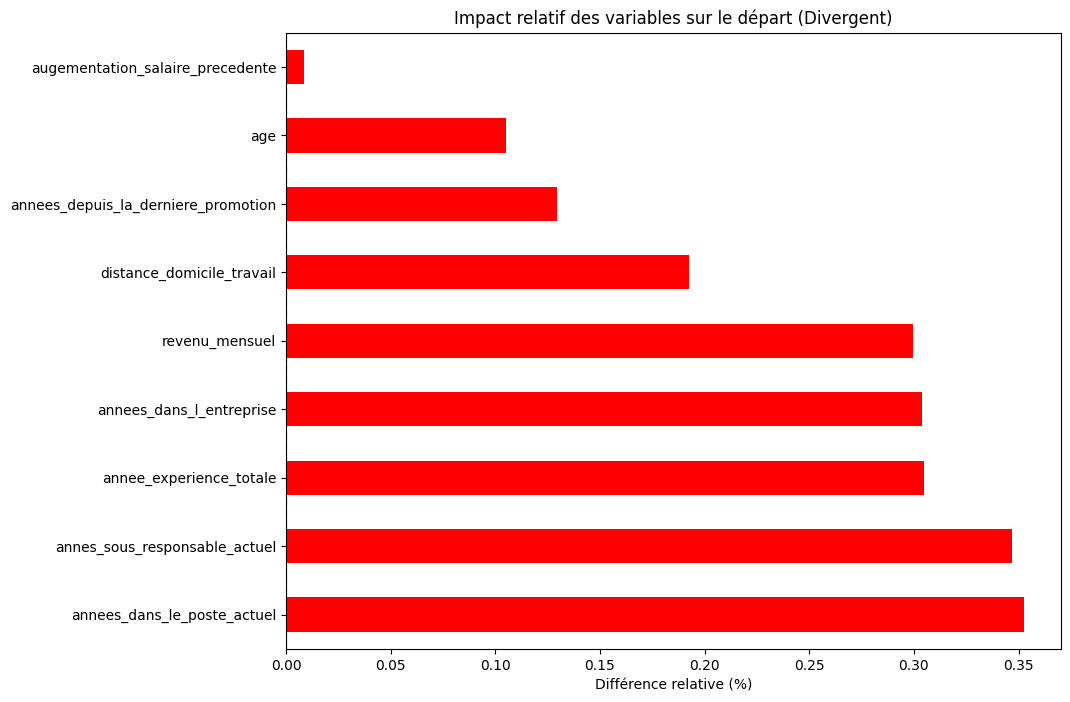

In [52]:
couleurs = ['red' if x > 0 else 'green' for x in ecart_relatif_sorted]
ecart_relatif_sorted.plot(kind='barh', color=couleurs, figsize=(10, 8))
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Impact relatif des variables sur le départ (Divergent)")
plt.xlabel("Différence relative (%)")
plt.show()

/tmp/ipykernel_6062/1388107479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='annees_dans_le_poste_actuel', y='a_quitte_l_entreprise',


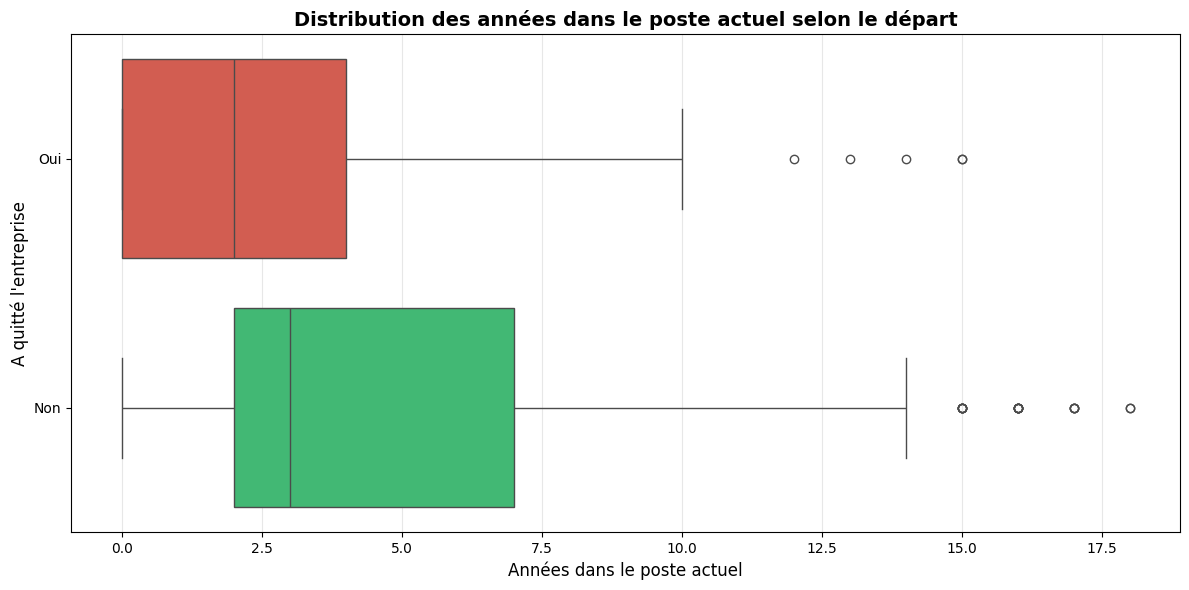

In [53]:
data['annees_dans_le_poste_actuel'].unique()
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='annees_dans_le_poste_actuel', y='a_quitte_l_entreprise', 
            palette={'Oui': '#e74c3c', 'Non': '#2ecc71'})
plt.title("Distribution des années dans le poste actuel selon le départ", fontsize=14, fontweight='bold')
plt.xlabel("Années dans le poste actuel", fontsize=12)
plt.ylabel("A quitté l'entreprise", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

###### Analyse Univarié

Top 5 : ['annees_dans_le_poste_actuel', 'annes_sous_responsable_actuel', 'annee_experience_totale', 'annees_dans_l_entreprise', 'revenu_mensuel']


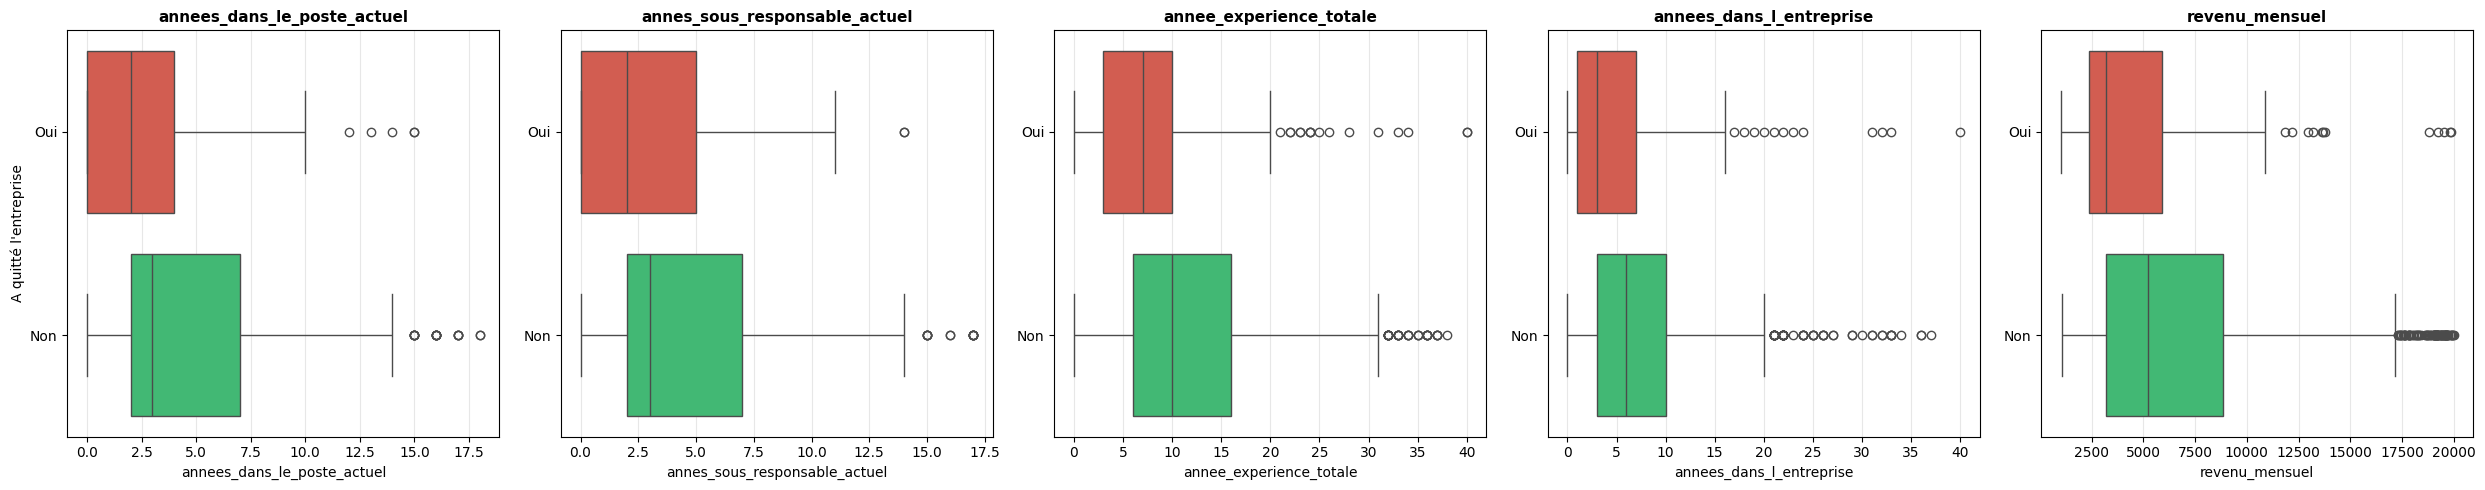

In [54]:
top5_variables = ecart_relatif_sorted.head(5).index.tolist()
print("Top 5 :", top5_variables)

# J'augmente un peu la largeur (25) pour que les 5 graphiques respirent
fig, axes = plt.subplots(1, 5, figsize=(25, 5)) 

for i, variable in enumerate(top5_variables):
    sns.boxplot(
        data=data, 
        x=variable,              # La variable numérique (ex: Salaire)
        y='a_quitte_l_entreprise', # La variable catégorielle (Oui/Non)
        hue='a_quitte_l_entreprise', # Important pour que la palette s'applique aux couleurs
        palette={'Oui': '#e74c3c', 'Non': '#2ecc71'},
        ax=axes[i]               # INDISPENSABLE : On dessine sur le i-ème graphique
    )
    
    # On utilise les méthodes de l'objet 'ax' et non 'plt'
    axes[i].set_title(f"{variable}", fontsize=11, fontweight='bold')
    axes[i].set_xlabel(variable, fontsize=10)
    
    # Pour éviter de répéter "A quitté..." 5 fois, on le met que sur le premier
    if i == 0:
        axes[i].set_ylabel("A quitté l'entreprise", fontsize=10)
    else:
        axes[i].set_ylabel("") # On vide le label pour les autres
        
    axes[i].grid(axis='x', alpha=0.3)

# Le tight_layout se met TOUJOURS à la fin, hors de la boucle
plt.tight_layout()
plt.show()


###### Analyse multivarié

**Corrélation/HeatMap**

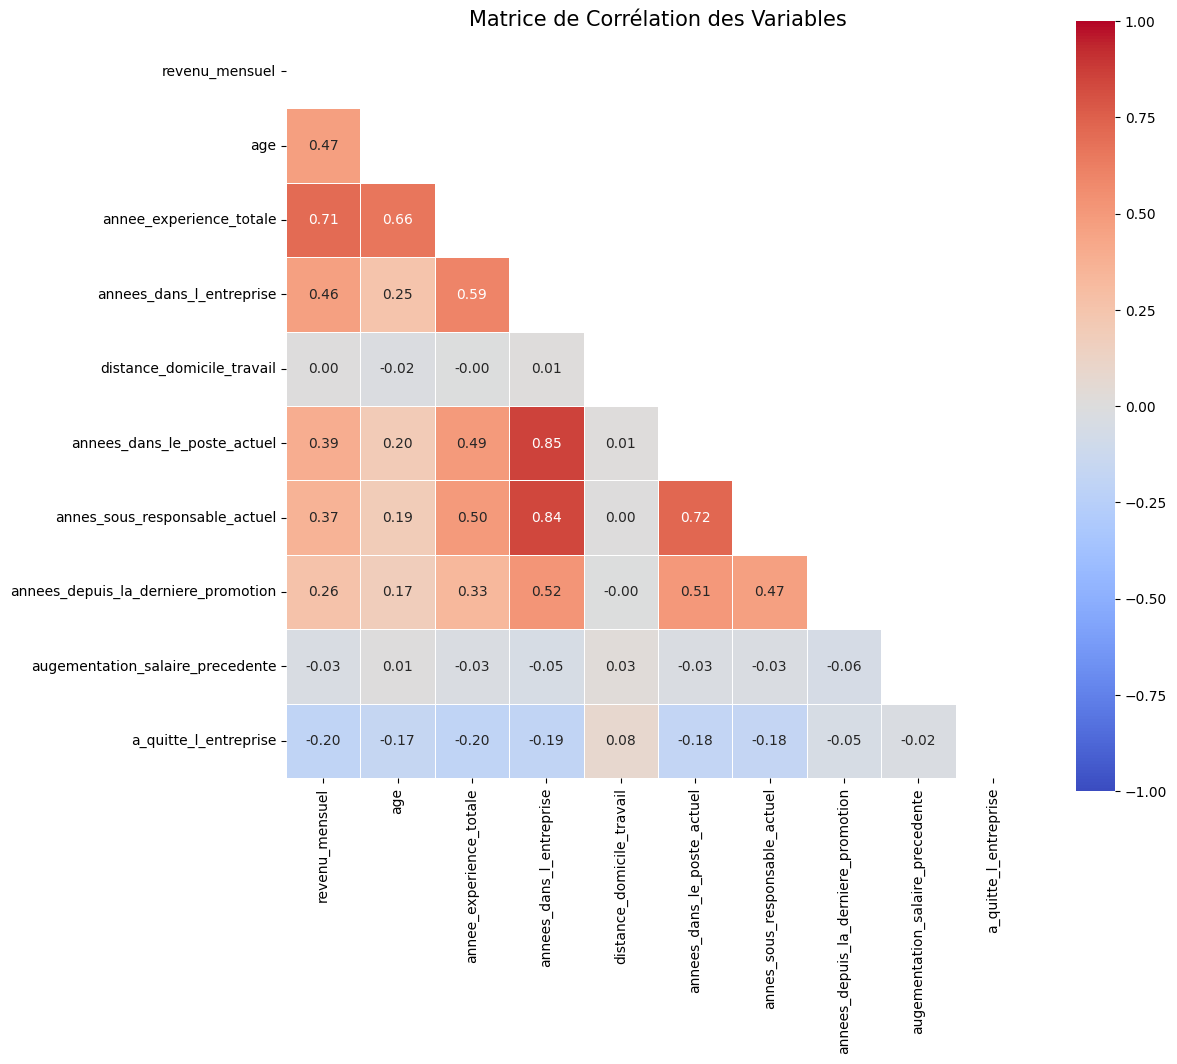

In [55]:
corr_matrix = data_num.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(12, 10)) # Une taille suffisante est clé pour la lisibilité
df_temp = data_num.copy()
df_temp[target] = data['a_quitte_l_entreprise'].apply(lambda x: 1 if x == 'Oui' else 0)
corr_matrix = df_temp.corr(method='spearman', numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Configuration Expert
sns.heatmap(
    corr_matrix, 
    annot=True,         # Affiche les chiffres dans les cases
    fmt=".2f",          # Formattage : 2 chiffres après la virgule (lisibilité)
    cmap='coolwarm',    # Palette divergente (Bleu = Négatif, Rouge = Positif)
    center=0,           # Le blanc est à 0 (neutre)
    vmin=-1, vmax=1,    # Borne l'échelle pour que les couleurs soient justes
    linewidths=0.5,     # Petites lignes blanches pour séparer les cases
    square=True,        # Force les cases à être carrées
    mask=mask
)

plt.title("Matrice de Corrélation des Variables", fontsize=15)
plt.show()

#### Catégorielle

In [56]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   genre                                      1470 non-null   object
 1   statut_marital                             1470 non-null   object
 2   departement                                1470 non-null   object
 3   poste                                      1470 non-null   object
 4   nombre_experiences_precedentes             1470 non-null   int64 
 5   satisfaction_employee_environnement        1470 non-null   int64 
 6   note_evaluation_precedente                 1470 non-null   int64 
 7   niveau_hierarchique_poste                  1470 non-null   int64 
 8   satisfaction_employee_nature_travail       1470 non-null   int64 
 9   satisfaction_employee_equipe               1470 non-null   int64 
 10  satisfaction_employee_equilibre_pro_

In [57]:
# 1. Calcul du Taux Global 
taux_global = (data_cat['a_quitte_l_entreprise'] == 'Oui').mean()
print(f"--- Taux de départ Global de l'entreprise : {taux_global:.2%} ---\n")

--- Taux de départ Global de l'entreprise : 16.12% ---



##### Analyse Bivariée

**Le Profilage du Risque (Risk Profiling)**

In [58]:
# 2. Liste des colonnes à analyser (Tout sauf la cible)
cols_a_analyser = [c for c in data_cat.columns if c != 'a_quitte_l_entreprise']

In [59]:
risk_data = []

# 3. La Boucle d'Analyse
for col in cols_a_analyser:
    # Tableau croisé : Variable vs Départ (en %)
    ct = pd.crosstab(data_cat[col], data_cat['a_quitte_l_entreprise'], normalize='index')
    
    # Sécurité : Si une catégorie n'a aucun départ (pas de colonne 'Oui'), on passe
    if 'Oui' in ct.columns:
        # On cherche la catégorie (index) qui a le taux 'Oui' le plus fort
        worst_category = ct['Oui'].idxmax()
        worst_rate = ct['Oui'].max()
        
        # On ne garde que si c'est significativement supérieur à la moyenne (ex: > Taux Global + 5%)
        if worst_rate > taux_global:
            risk_data.append({
                'Variable': col,
                'Segment_a_Risque': worst_category,
                'Taux_Depart_Segment': round(worst_rate, 4),
                'Ecart_vs_Global': round(worst_rate - taux_global, 4)
            })

In [60]:
# 4. Création et Tri du DataFrame final
df_risk = pd.DataFrame(risk_data).sort_values('Taux_Depart_Segment', ascending=False)
# Affichage avec une barre de progression visuelle (style pandas)
print(df_risk)

                                     Variable         Segment_a_Risque  \
3                                       poste  Représentant Commercial   
6                  note_evaluation_precedente                        1   
10  satisfaction_employee_equilibre_pro_perso                        1   
12                      heure_supplementaires                      Oui   
14                      nb_formations_suivies                        0   
7                   niveau_hierarchique_poste                        1   
16                              domaine_etude      Ressources Humaines   
1                              statut_marital              Célibataire   
4              nombre_experiences_precedentes                        5   
5         satisfaction_employee_environnement                        1   
17                      frequence_deplacement                 Frequent   
13                   nombre_participation_pee                        0   
8        satisfaction_employee_nature_

##### Enquête Croisée (Catégorie vs Catégorie)

In [61]:
# Indice : On croise le Top 1 (Poste) avec le Heures 
# On normalise par index pour voir : "Parmi les Commerciaux, quel % fait des heures sup ?"
interaction = pd.crosstab(
    data['poste'], 
    data['heure_supplementaires'], 
    normalize='index'
)

# Affiche les "mauvais élèves" en premier (ceux qui font le plus d'heures sup)
print(interaction.sort_values(by='Oui', ascending=False))

heure_supplementaires         Non       Oui
poste                                      
Assistant de Direction   0.667808  0.332192
Représentant Commercial  0.710843  0.289157
Cadre Commercial         0.711656  0.288344
Directeur Technique      0.712500  0.287500
Manager                  0.717557  0.282443
Tech Lead                0.731034  0.268966
Senior Manager           0.735294  0.264706
Ressources Humaines      0.750000  0.250000
Consultant               0.760618  0.239382


In [62]:
# Indice : On croise le Top 1 (Poste) avec le top 2 (note_evaluation_precedente) 
# On normalise par index pour voir : "Parmi les Commerciaux, quel % fait des heures sup ?"
interaction = pd.crosstab(
    data['poste'], 
    data['note_evaluation_precedente'], 
    normalize='index'
)

# Affiche les "mauvais élèves" en premier (ceux qui font le plus d'heures sup)
print(interaction.sort_values(by=1, ascending=False))

note_evaluation_precedente         1         2         3         4
poste                                                             
Représentant Commercial     0.084337  0.240964  0.614458  0.060241
Consultant                  0.073359  0.258687  0.567568  0.100386
Cadre Commercial            0.058282  0.254601  0.601227  0.085890
Ressources Humaines         0.057692  0.269231  0.576923  0.096154
Tech Lead                   0.055172  0.289655  0.572414  0.082759
Manager                     0.053435  0.282443  0.541985  0.122137
Directeur Technique         0.050000  0.225000  0.625000  0.100000
Assistant de Direction      0.041096  0.243151  0.592466  0.123288
Senior Manager              0.039216  0.225490  0.656863  0.078431


##### Heatmap d'Association (V de Cramér)

Le V de Cramér, c'est la somme des différences entre la réalité et le hasard ($\chi^2$), divisée par le nombre de personnes ($N$), puis ajustée par la taille du tableau, pour obtenir un pourcentage de corrélation pur.

In [63]:
# 1. La fonction mathématique (V de Cramér)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    with np.errstate(divide='ignore', invalid='ignore'):
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [64]:
# 2. Sélection intelligente des colonnes
# On prend la cible + le top des variables suspectes (numériques déguisées en cat + texte)
cols_etude = [
    'a_quitte_l_entreprise',      # La cible
    'poste',                      # Le suspect n°1
    'note_evaluation_precedente',      
    'satisfaction_employee_equilibre_pro_perso', 
    'heure_supplementaires',  # Ordinale
    'nb_formations_suivies',           # Ordinale
    'niveau_hierarchique_poste', 
    'domaine_etude',
    'nombre_experiences_precedentes',
    'satisfaction_employee_environnement',
    'frequence_deplacement',
    'nombre_participation_pee',
    'satisfaction_employee_nature_travail'
]

# 3. Calcul de la matrice
cramers_matrix = pd.DataFrame(index=cols_etude, columns=cols_etude)

for col1 in cols_etude:
    for col2 in cols_etude:
        cramers_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Conversion en float pour l'affichage
cramers_matrix = cramers_matrix.astype(float)

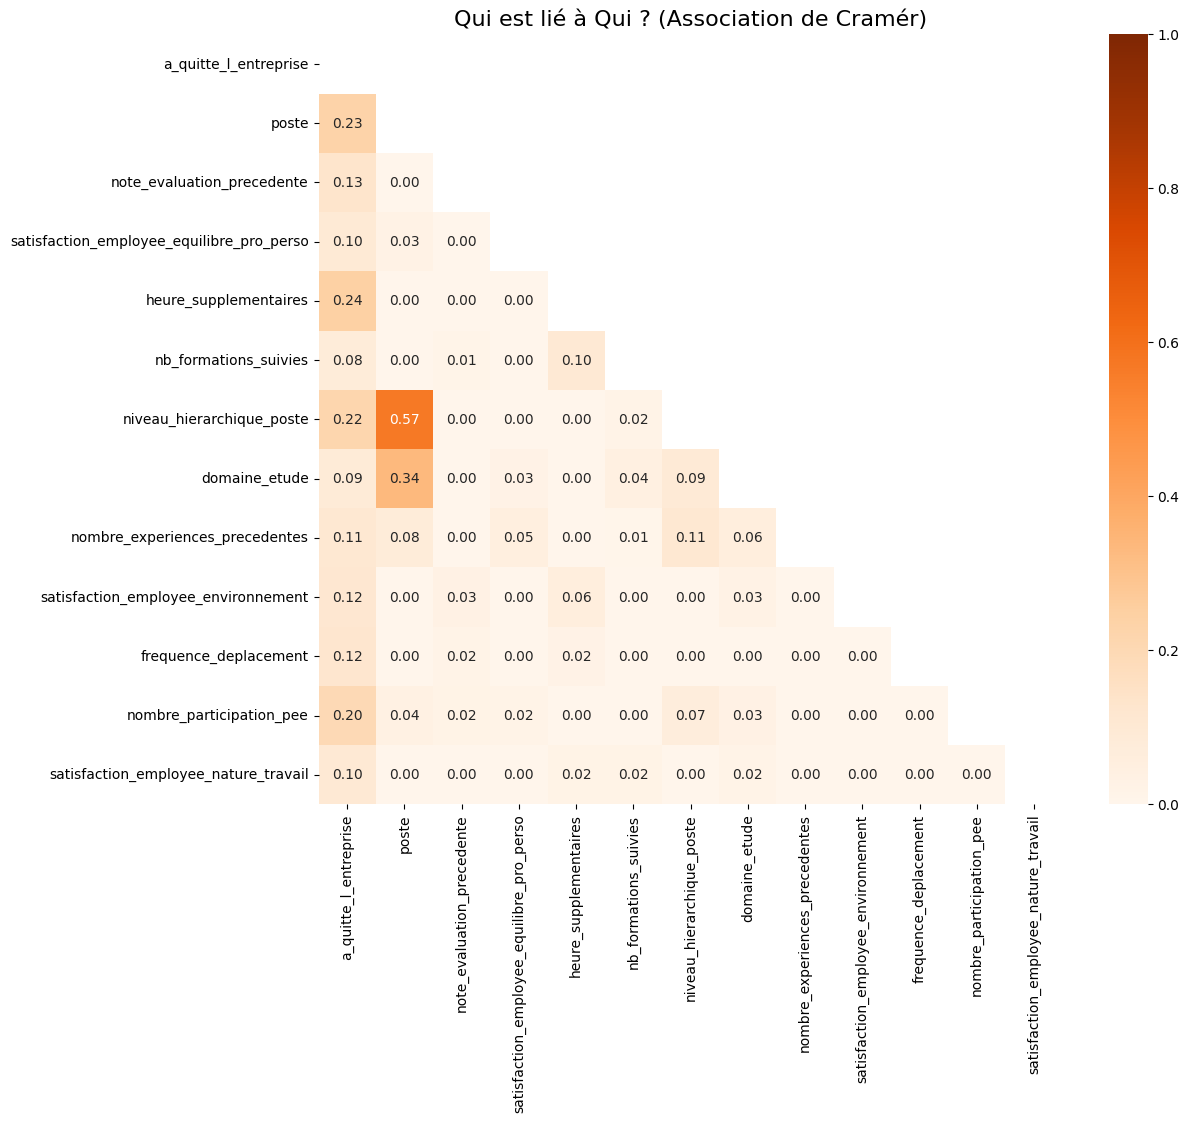

In [65]:
# 4. Affichage
plt.figure(figsize=(12, 10))
# Masque pour couper le triangle haut (doublon)
mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))

sns.heatmap(
    cramers_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='Oranges', 
    mask=mask,
    vmin=0, vmax=1
)
plt.title("Qui est lié à Qui ? (Association de Cramér)", fontsize=16)
plt.show()

# Préparation de la donnée pour le machine learning

In [66]:
def preparer_donnees_ml(df_entree, target_col='a_quitte_l_entreprise'):
    """
    Transforme le DataFrame business en objets X et y prêts pour Sklearn.
    """
    df = df_entree.copy()
    
    # 1. Encodage de la cible (Oui/Non -> 1/0)
    # Indice : Utilisez .map() ou .replace()
    y = df[target_col].map({'Oui': 1, 'Non': 0})
    
    # 2. Suppression des colonnes redondantes (identifiées en Phase 1)
    # Rappel : Gardez 'annees_dans_le_poste' et jetez les autres temporelles corrélées
    cols_a_supprimer = [
        target_col, 
        'id_employee', 'id_extracted', # Toujours nettoyer les IDs
        'annees_dans_l_entreprise',    # Exemple de suppression
        'annes_sous_responsable_actuel' # Exemple de suppression
    ]
    X_brut = df.drop(columns=cols_a_supprimer, errors='ignore')
    
    # 3. Encodage des variables Nominales (One-Hot)
    # Indice : pandas.get_dummies est votre ami.
    # Attention : Ne mettez PAS les variables ordinales (Satisfaction) ici !
    # Pandas détecte auto les colonnes 'object', mais soyez vigilants.
    X_encoded = pd.get_dummies(X_brut, drop_first=True, dtype=int)
    
    return X_encoded, y

# Utilisation
X, y = preparer_donnees_ml(data)